In [1]:
print('hello, world!')

hello, world!


Modules Needed:
- requests
- shapely
- rasterio
- matplotlib

## Fetching satellite images from `spectator API` with given coordinates

### Loading the `API_KEY`

In [1]:
import os

API_KEY: str = os.getenv('API_KEY')
# print(API_KEY)

### Getting appropriate image

In [2]:
import requests
from shapely import geometry
from pprint import pprint

coordinates and polygon geometry

using `WKT` format instead of `bbox` to fetch satellite images

![lon - lat](https://diligentias.com/wp-content/uploads/2019/05/latitude-Longitude.jpeg)

<p style="color: red">What is the format of individual points in the coordinates?</p>

Is it (lon, lat) or (lat, lon)

In [3]:
coordinates: list[tuple[float, float]] = [
    (78.029715, 20.583639),
    (78.044536, 20.584024),
    (78.043671, 20.571318),
    (78.031456, 20.572034)
]

coordinatesPolygon: geometry.Polygon = geometry.Polygon(coordinates)

In [4]:
print(coordinatesPolygon)

POLYGON ((78.029715 20.583639, 78.044536 20.584024, 78.043671 20.571318, 78.031456 20.572034, 78.029715 20.583639))


requesting for available images from `spectator API`

In [5]:
url: str = "https://api.spectator.earth/imagery/"

# cloud percentage less than
cc_less_than: str = '20.00' 

# all latest images from that date
date_from: str = '2022-02-10'

# params using `geometry` of type `shapely.geometry.Polygon`.
params = {
    'api_key': API_KEY,
    'geometry': coordinatesPolygon,
    'cc_less_than': cc_less_than,
    'date_from': date_from
}

response = requests.get(url, params=params)
data = response.json()

In [6]:
pprint(data, indent=2)

{ 'next': None,
  'page': 1,
  'previous': None,
  'results': [ { 'begin_position_date': '2022-09-03T05:16:49.024000Z',
                 'cloud_cover_percentage': '11.07',
                 'download_url': 'http://api.spectator.earth/imagery/29202441/files/',
                 'end_position_date': '2022-09-03T05:16:49.024000Z',
                 'geometry': { 'coordinates': [ [ [ 78.68450634398086,
                                                    19.769538344002026],
                                                  [ 78.68825242707811,
                                                    19.784467178704443],
                                                  [ 78.72495609834434,
                                                    19.93276094180681],
                                                  [ 78.76224791134644,
                                                    20.08088721897804],
                                                  [ 78.79940696323852,
                           

### selecting the first image

here we are selecting the first image, later we can write some code to select the most appropriate image, if required.

In [9]:
if len(data['results']) == 0:
    print('no image found')
    raise Exception('No Image result present for the given coordinates.')

# selecting the first image
selected_result: dict = data['results'][0]

In [10]:
download_url: str = selected_result['download_url']
print(download_url)
apikey_param = {'api_key': API_KEY}
selected_result_response = requests.get(download_url, params=apikey_param)
selected_result_data = selected_result_response.json()

http://api.spectator.earth/imagery/27931582/files/


In [11]:
pprint(selected_result_data, indent=2)

[ {'name': 'B01.jp2', 'path': 'B01.jp2', 'size': 2783634},
  {'name': 'B02.jp2', 'path': 'B02.jp2', 'size': 79860024},
  {'name': 'B03.jp2', 'path': 'B03.jp2', 'size': 82243905},
  {'name': 'B04.jp2', 'path': 'B04.jp2', 'size': 90111523},
  {'name': 'B05.jp2', 'path': 'B05.jp2', 'size': 25685556},
  {'name': 'B06.jp2', 'path': 'B06.jp2', 'size': 27237671},
  {'name': 'B07.jp2', 'path': 'B07.jp2', 'size': 28221366},
  {'name': 'B08.jp2', 'path': 'B08.jp2', 'size': 97631491},
  {'name': 'B09.jp2', 'path': 'B09.jp2', 'size': 2729811},
  {'name': 'B10.jp2', 'path': 'B10.jp2', 'size': 1330206},
  {'name': 'B11.jp2', 'path': 'B11.jp2', 'size': 27963553},
  {'name': 'B12.jp2', 'path': 'B12.jp2', 'size': 26720827},
  {'name': 'B8A.jp2', 'path': 'B8A.jp2', 'size': 28960380},
  {'name': 'TCI.jp2', 'path': 'TCI.jp2', 'size': 109687101},
  {'name': 'metadata.xml', 'path': 'metadata.xml', 'size': 459859},
  {'name': 'preview.jp2', 'path': 'preview.jp2', 'size': 166794},
  {'name': 'preview.jpg', 'p

🔼 the above code gets the list of different bands available for the selected image

json output of the above request
```json
[
    {
        "name": "B01.jp2",
        "path": "B01.jp2",
        "size": 2182245
    },
    {
        "name": "B02.jp2",
        "path": "B02.jp2",
        "size": 61991584
    },
]
```

### Required Bands

In [24]:
indices: list[int] = [3, 7]
# i.e. band 4 and band 8

getting the 4th band - Red band

In [12]:
band4_image = selected_result_data[3]

print(f"name: {band4_image['name']}")
print(f"path: {band4_image['path']}")
print(f"size: {band4_image['size']}")

band4_url = f"{download_url}{band4_image['path']}"
print(band4_url)

apikey_param = {'api_key': API_KEY}
band4_response = requests.get(band4_url, params=apikey_param)
band4_image_data = band4_response.content

name: B04.jp2
path: B04.jp2
size: 90111523
http://api.spectator.earth/imagery/27931582/files/B04.jp2


check downloaded image size

In [13]:
print(len(band4_image_data))

90111523


save the download image to file with appropriate name

In [31]:
with open(band4_image['name'], 'wb') as file:
    file.write(band4_image_data)

getting the 8th band

In [14]:
band8_image = selected_result_data[7]

print(f"name: {band8_image['name']}")
print(f"path: {band8_image['path']}")
print(f"size: {band8_image['size']}")

band8_url = f"{download_url}{band8_image['path']}"
print(band8_url)
apikey_params = {'api_key': API_KEY}
band8_response = requests.get(band8_url, params=apikey_param)
band8_image_data = band8_response.content

name: B08.jp2
path: B08.jp2
size: 97631491
http://api.spectator.earth/imagery/27931582/files/B08.jp2


checking downloaded image size

In [15]:
print(len(band8_image_data))

97631491


writing the downloaded image to file

In [16]:
with open(band8_image['name'], 'wb') as file:
    file.write(band8_image_data)

### Showing the downloaded image

In [17]:
import rasterio
from rasterio import plot

show band 4 image

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32643), 'transform': Affine(10.0, 0.0, 799980.0,
       0.0, -10.0, 2300040.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True}


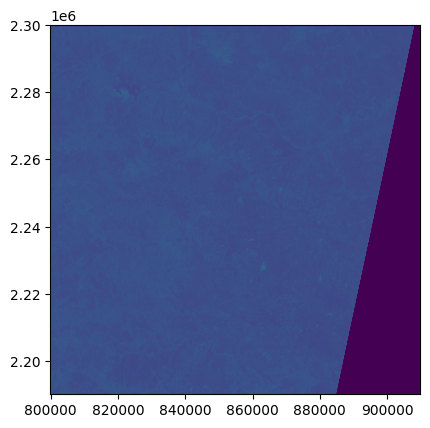

In [19]:
with rasterio.open('B04.jp2') as image:
    pprint(image.profile, indent=2)

    plot.show(image)

show band 8 image

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32643), 'transform': Affine(10.0, 0.0, 799980.0,
       0.0, -10.0, 2300040.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True}


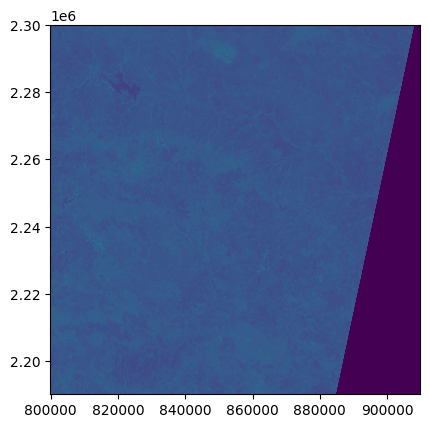

In [20]:
with rasterio.open('B08.jp2') as image:
    pprint(image.profile, indent=2)

    plot.show(image)

## Clipping the downloaded image to required dimensions according to given coordinates

- crs is like a unit, different crs values are like different unit used by different countries to geographical location area
- standard crs = EPSG:4326
- crs represents the amount of pixel density (!!! maybe wrong meaning)
- changing crs of the image results in changing transform, width and height also
- so the image meta data remains same except its crs, width and height

`jp2` image can not be clipped, so it need to convert to `tif` format. And also the image's CRS is too high, we also need to reduce it to 'EPSG:4326', also because its standard for geosensing.

### Converting `jp2` to `tif` format

In [21]:
from rasterio import warp

In [22]:
dst_crs = 'EPSG:4326'

converting `B04.jp2` to `B04.tif`

In [23]:
with rasterio.open('B04.jp2') as image:
    # pprint([*image.bounds])
    transform, width, height = warp.calculate_default_transform(image.crs, dst_crs, 
        image.width, image.height, *image.bounds)

    # props = properties or key value pairs
    kwargs = image.meta.copy()
    # pprint(kwargs, indent=2)

    # kwargs.update({'crs': dst_crs, 'transform': transform, 'width': width, 'height': height})
    kwargs['crs'] = dst_crs
    kwargs['transform'] = transform
    kwargs['width'] = width
    kwargs['height'] = height

    pprint(kwargs, indent=2)

    dst_filename = 'B04.tif'
    with rasterio.open(dst_filename, 'w', **kwargs) as dst:
        print(dst_filename)

        for j in range(1, image.count + 1):
            warp.reproject(
                source=rasterio.band(image, j),
                destination=rasterio.band(dst, j),
                src_transform=image.transform,
                src_crs=image.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=warp.Resampling.nearest
            )

{ 'count': 1,
  'crs': 'EPSG:4326',
  'driver': 'JP2OpenJPEG',
  'dtype': 'uint16',
  'height': 10886,
  'nodata': None,
  'transform': Affine(9.284665926211088e-05, 0.0, 77.86294309475092,
       0.0, -9.284665926211088e-05, 20.776051689218036),
  'width': 11538}
B04.tif


converting `B08.jp2` to `B08.tif`

In [24]:
with rasterio.open('B08.jp2') as image:
    # pprint([*image.bounds])
    transform, width, height = warp.calculate_default_transform(image.crs, dst_crs, 
        image.width, image.height, *image.bounds)

    # props = properties or key value pairs
    kwargs = image.meta.copy()
    # pprint(kwargs, indent=2)

    # kwargs.update({'crs': dst_crs, 'transform': transform, 'width': width, 'height': height})
    kwargs['crs'] = dst_crs
    kwargs['transform'] = transform
    kwargs['width'] = width
    kwargs['height'] = height

    pprint(kwargs, indent=2)

    dst_filename = 'B08.tif'
    with rasterio.open(dst_filename, 'w', **kwargs) as dst:
        print(dst_filename)

        for j in range(1, image.count + 1):
            warp.reproject(
                source=rasterio.band(image, j),
                destination=rasterio.band(dst, j),
                src_transform=image.transform,
                src_crs=image.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=warp.Resampling.nearest
            )

{ 'count': 1,
  'crs': 'EPSG:4326',
  'driver': 'JP2OpenJPEG',
  'dtype': 'uint16',
  'height': 10886,
  'nodata': None,
  'transform': Affine(9.284665926211088e-05, 0.0, 77.86294309475092,
       0.0, -9.284665926211088e-05, 20.776051689218036),
  'width': 11538}
B08.tif


### Showing converted images

In [25]:
import rasterio
from rasterio import plot

{ 'blockxsize': 1024,
  'blockysize': 1024,
  'count': 1,
  'crs': CRS.from_epsg(4326),
  'driver': 'JP2OpenJPEG',
  'dtype': 'uint16',
  'height': 10886,
  'nodata': None,
  'tiled': True,
  'transform': Affine(9.284665926211088e-05, 0.0, 77.86294309475092,
       0.0, -9.284665926211088e-05, 20.776051689218036),
  'width': 11538}


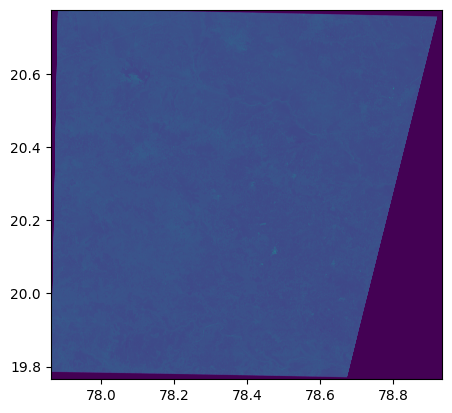

In [26]:
with rasterio.open('B04.tif') as image:
    pprint(image.profile, indent=2)
    
    plot.show(image)

{ 'blockxsize': 1024,
  'blockysize': 1024,
  'count': 1,
  'crs': CRS.from_epsg(4326),
  'driver': 'JP2OpenJPEG',
  'dtype': 'uint16',
  'height': 10886,
  'nodata': None,
  'tiled': True,
  'transform': Affine(9.284665926211088e-05, 0.0, 77.86294309475092,
       0.0, -9.284665926211088e-05, 20.776051689218036),
  'width': 11538}


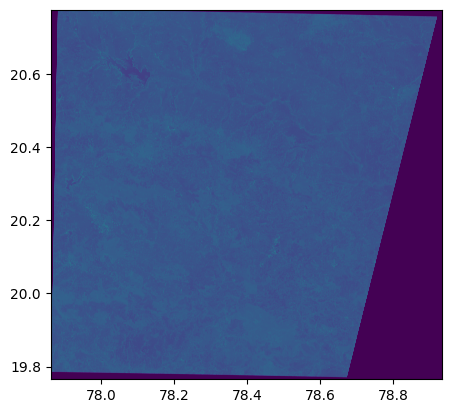

In [27]:
with rasterio.open('B08.tif') as image:
    pprint(image.profile, indent=2)
    
    plot.show(image)

### Showing the area to be clipped from the actual image

In [32]:
import rasterio
from rasterio import features

get image geometry

In [39]:
image_geom = {}
with rasterio.open('B04.tif') as dataset:
    # Read the dataset's valid data mask as ndarray
    mask = dataset.dataset_mask()
    
    for geom, val in features.shapes(mask, transform=dataset.transform):
        image_geom = geom

create `shapely.geometry.Polygon`

In [37]:
from shapely import geometry

In [40]:
image_polygon = geometry.Polygon([point for point in image_geom['coordinates'][0]])
print(image_polygon)

POLYGON ((77.86294309475092 20.776051689218036, 77.86294309475092 19.765322956490696, 78.93420784931715 19.765322956490696, 78.93420784931715 20.776051689218036, 77.86294309475092 20.776051689218036))


plot the two polygons

In [41]:
import matplotlib.pyplot as plt

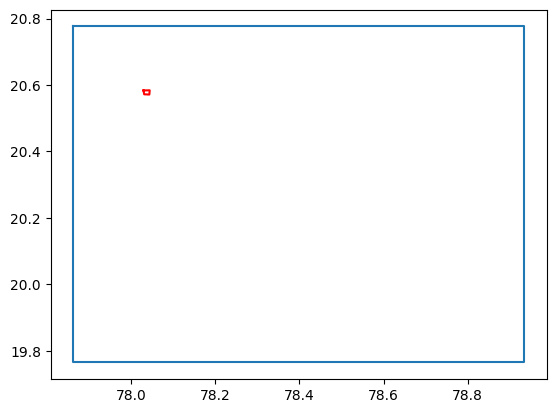

In [44]:
x, y = image_polygon.exterior.xy
plt.plot(x, y)

x2, y2 = coordinatesPolygon.exterior.xy
plt.plot(x2, y2, color='red')

In [45]:
image_polygon.contains(coordinatesPolygon)

True

### Clipping the image according to given coordinates

In [47]:
import rasterio
from rasterio import mask
from shapely import geometry

creating shape from polygon

In [48]:
shapes = [geometry.mapping(coordinatesPolygon)]

In [49]:
pprint(shapes, indent=2)

[ { 'coordinates': ( ( (78.029715, 20.583639),
                       (78.044536, 20.584024),
                       (78.043671, 20.571318),
                       (78.031456, 20.572034),
                       (78.029715, 20.583639)),),
    'type': 'Polygon'}]


clipping `B04.tif` to create `clipped_B04.tif`

create the clipped image from tif image file using `shapely.geometry.Polygon` of the coordinates.

In [50]:
with rasterio.open('B04.tif') as src:
    clipped_image, clipped_image_transform = mask.mask(src, shapes, crop=True)

    clipped_image_meta = src.meta
    clipped_image_meta.update({
        'driver': 'GTiff',
        'height': clipped_image.shape[1],
        'width': clipped_image.shape[2],
        'transform': clipped_image_transform
    })

    with rasterio.open('clipped_B04.tif', 'w', **clipped_image_meta) as dst:
        dst.write(clipped_image)

clipping `B08.tif` to create `clipped_B08.tif`

In [53]:
with rasterio.open('B08.tif') as src:
    clipped_image, clipped_image_transform = mask.mask(src, shapes, crop=True)

    clipped_image_meta = src.meta
    clipped_image_meta.update({
        'driver': 'GTiff',
        'height': clipped_image.shape[1],
        'width': clipped_image.shape[2],
        'transform': clipped_image_transform
    })

    with rasterio.open('clipped_B08.tif', 'w', **clipped_image_meta) as dst:
        dst.write(clipped_image)

### Showing clipped images

In [51]:
import rasterio
from rasterio import plot

clipped_B04.tif

{ 'count': 1,
  'crs': CRS.from_epsg(4326),
  'driver': 'GTiff',
  'dtype': 'uint16',
  'height': 138,
  'interleave': 'band',
  'nodata': None,
  'tiled': False,
  'transform': Affine(9.284665926211088e-05, 0.0, 78.02969569478567,
       0.0, -9.284665926211088e-05, 20.584044797863992),
  'width': 160}


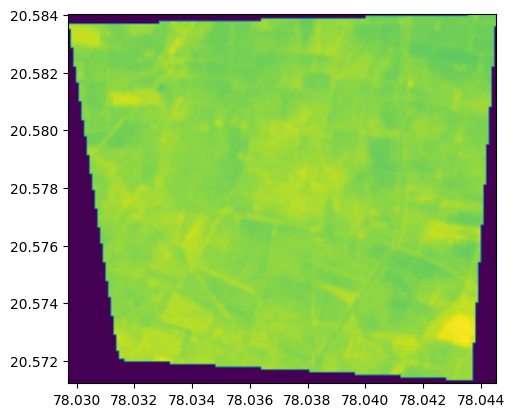

In [52]:
with rasterio.open('clipped_B04.tif') as image:
    pprint(image.profile, indent = 2)

    plot.show(image)

clipped_B08.tif

{ 'count': 1,
  'crs': CRS.from_epsg(4326),
  'driver': 'GTiff',
  'dtype': 'uint16',
  'height': 138,
  'interleave': 'band',
  'nodata': None,
  'tiled': False,
  'transform': Affine(9.284665926211088e-05, 0.0, 78.02969569478567,
       0.0, -9.284665926211088e-05, 20.584044797863992),
  'width': 160}


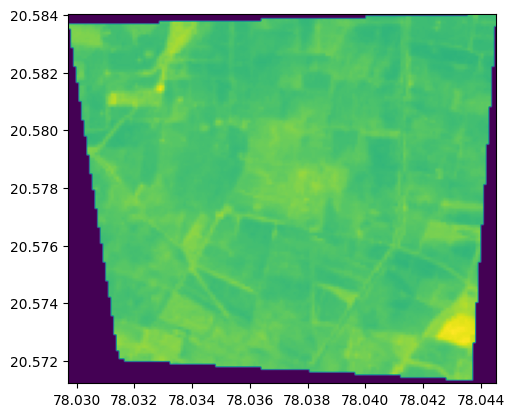

In [54]:
with rasterio.open('clipped_B08.tif') as image:
    pprint(image.profile, indent = 2)

    plot.show(image)

### Calculating NDVI

In [55]:
import rasterio

In [58]:
bands: list[str] = ['clipped_B04.tif', 'clipped_B08.tif']
full_image: list = [
    rasterio.open('clipped_B04.tif', 'r', driver='GTiff').read(),
    rasterio.open('clipped_B08.tif', 'r', driver='GTiff').read()
]

raster_img_f4: list = [image.astype('f4') for image in full_image]

In [60]:
print(raster_img_f4)

[array([[[   0.,    0.,    0., ..., 2371., 2363., 2392.],
        [   0.,    0.,    0., ..., 2367., 2362., 2360.],
        [   0.,    0.,    0., ..., 2399., 2376., 2363.],
        ...,
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.]]], dtype=float32), array([[[   0.,    0.,    0., ..., 2422., 2456., 2463.],
        [   0.,    0.,    0., ..., 2441., 2457., 2464.],
        [   0.,    0.,    0., ..., 2486., 2467., 2452.],
        ...,
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.]]], dtype=float32)]


applying NDVI formula

$$
NDVI = \frac{RED - NEAR RED}{RED + NEAR RED}
$$

In [67]:
ndvi_clipped = (raster_img_f4[0] - raster_img_f4[1]) / (raster_img_f4[0] + raster_img_f4[1])

C:\Users\Akash\AppData\Local\Temp\ipykernel_10624\265931268.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi_clipped = (raster_img_f4[0] - raster_img_f4[1]) / (raster_img_f4[0] + raster_img_f4[1])


In [63]:
import numpy as np

In [64]:
ndvi_clipped = np.divide(np.subtract(raster_img_f4[0], raster_img_f4[1]), np.add(raster_img_f4[0], raster_img_f4[1]))

C:\Users\Akash\AppData\Local\Temp\ipykernel_10624\3738221507.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi_clipped = np.divide(np.subtract(raster_img_f4[0], raster_img_f4[1]), np.add(raster_img_f4[0], raster_img_f4[1]))


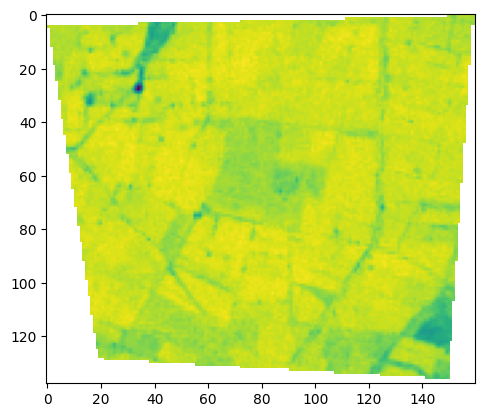

<AxesSubplot:>

In [68]:
from rasterio import plot

plot.show(ndvi_clipped)